In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Mini Project DataSet/Online Retail.xlsx")
data.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


We need not convert all the attributes into numeric values. Because we are just dng analysis. If we are predicting any outcome then we have to convert because we don't know if the categorical attributes contribute to the prediction or no.

In [ ]:
data.shape

(541909, 8)

In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.shape

(406829, 8)

Nearly 1.5Lakh rows were deleted

In [ ]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Checking again if any null values are there

In [ ]:
data.duplicated().sum()

5225

In [ ]:
data_new= data.drop_duplicates()

In [ ]:
data_new.shape

(401604, 8)

In [ ]:
cols = ['Quantity', 'UnitPrice']

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data_cleaned = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
print(Q1)

Quantity     2.00
UnitPrice    1.25
Name: 0.25, dtype: float64


In [ ]:
Q3

Quantity     12.00
UnitPrice     3.75
Name: 0.75, dtype: float64

In [ ]:
IQR

Quantity     10.0
UnitPrice     2.5
dtype: float64

In [ ]:
data_cleaned.shape

(344393, 8)

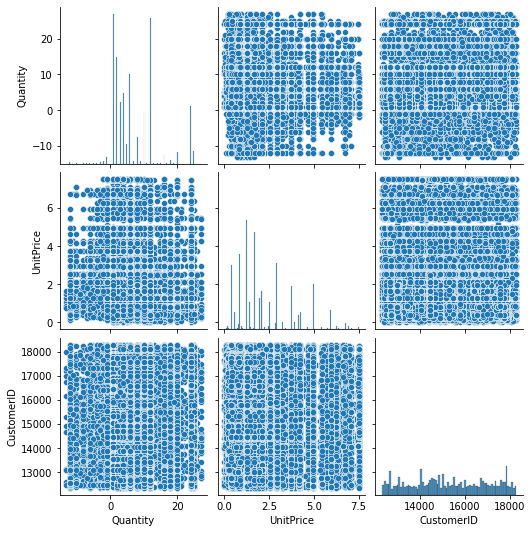

In [ ]:
import seaborn as sns
sns.pairplot(data_cleaned)

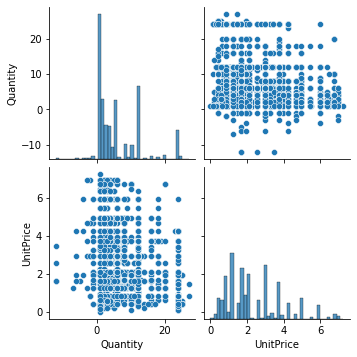

In [ ]:
import seaborn as sns
sns.pairplot(data_cleaned[['Quantity', 'UnitPrice']].loc[:10000])

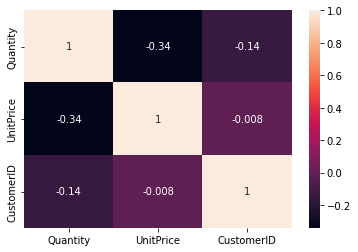

In [ ]:
sns.heatmap(data_cleaned.corr(method='pearson'), annot=True)

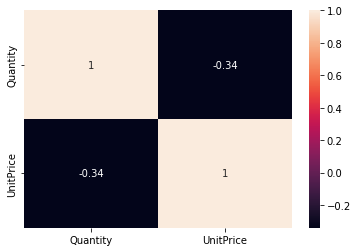

In [ ]:
sns.heatmap(data_cleaned[['Quantity', 'UnitPrice']].corr(method='pearson'), annot=True)

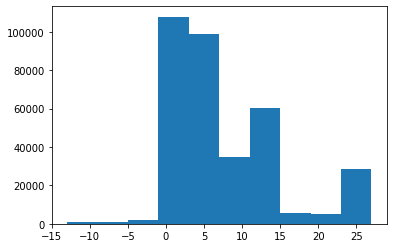

In [ ]:
plt.hist(data_cleaned['Quantity']);

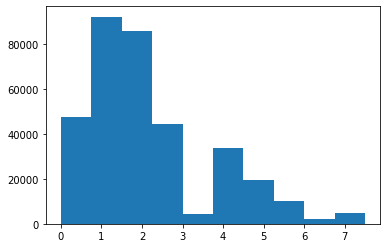

In [ ]:
plt.hist(data_cleaned['UnitPrice']);

In [ ]:
data_cleaned['Date'] = pd.to_datetime(data_cleaned['InvoiceDate']).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_cleaned.head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01


In [ ]:
data_cleaned['Date'].value_counts()

2011-11-06    3096
2011-12-05    2970
2011-11-20    2837
2011-11-23    2806
2011-11-10    2722
              ... 
2011-08-30     335
2010-12-23     310
2010-12-21     295
2011-02-06     238
2010-12-22     182
Name: Date, Length: 305, dtype: int64

In [ ]:
max(data_cleaned['Date'])

datetime.date(2011, 12, 9)

In [ ]:
min(data_cleaned['Date'])

datetime.date(2010, 12, 1)

In [ ]:
x = pd.DataFrame()
x['Recency'] = data_cleaned.groupby('CustomerID')['Date'].max()
x = x.reset_index()
print(x)

      CustomerID     Recency
0        12347.0  2011-12-07
1        12348.0  2011-04-05
2        12349.0  2011-11-21
3        12350.0  2011-02-02
4        12352.0  2011-11-03
...          ...         ...
4217     18280.0  2011-03-07
4218     18281.0  2011-06-12
4219     18282.0  2011-12-02
4220     18283.0  2011-12-06
4221     18287.0  2011-10-28

[4222 rows x 2 columns]


In [ ]:
data_cleaned = data_cleaned.reset_index()
data_cleaned = data_cleaned.drop('index', axis = 1)
data_cleaned.head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
5,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01


In [ ]:
data_cleaned['Recency1'] = 0
for j in x['CustomerID']:
  data_cleaned['Recency1'][data_cleaned['CustomerID'] == j] = x['Recency'][x['CustomerID']==j].values[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_cleaned.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Recency1       0
dtype: int64

In [ ]:
y = pd.DataFrame()
y['count'] = data_cleaned['InvoiceNo'].groupby(data_cleaned['CustomerID']).nunique()
y = y.reset_index()
y

,CustomerID,count
0,12347.0,7
1,12348.0,3
2,12349.0,1
3,12350.0,1
4,12352.0,8
...,...,...
4217,18280.0,1
4218,18281.0,1
4219,18282.0,3
4220,18283.0,16


In [ ]:
data_cleaned['Frequency'] = 0
for j in y['CustomerID']:
  data_cleaned['Frequency'][data_cleaned['CustomerID'] == j] = y['count'][y['CustomerID']==j].values[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_cleaned['Frequency'].isna().sum()

0

In [ ]:
data_cleaned['Frequency'].head()

0    35
1    35
2    35
3    35
4    35
Name: Frequency, dtype: int64

In [ ]:
data_cleaned['bill'] = data_cleaned['Quantity']*data_cleaned['UnitPrice']
z = pd.DataFrame()
z['total'] = data_cleaned['bill'].groupby(data_cleaned['CustomerID']).sum()
z = z.reset_index()
z 

,CustomerID,total
0,12347.0,3314.73
1,12348.0,90.20
2,12349.0,999.15
3,12350.0,294.40
4,12352.0,1010.61
...,...,...
4217,18280.0,137.00
4218,18281.0,46.92
4219,18282.0,111.68
4220,18283.0,2051.98


In [ ]:
data_cleaned['Monetary'] = 0
for i in z['CustomerID']:
    data_cleaned['Monetary'][data_cleaned['CustomerID'] == i] = z['total'][z['CustomerID']==i].values[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Recency1       0
Frequency      0
bill           0
Monetary       0
dtype: int64

In [ ]:
data_cleaned[['Recency1','Frequency','Monetary']].head()

,Recency1,Frequency,Monetary
0,2011-02-10,35,4359.58
1,2011-02-10,35,4359.58
2,2011-02-10,35,4359.58
3,2011-02-10,35,4359.58
4,2011-02-10,35,4359.58


In [ ]:
data_cleaned[['Recency1','Frequency','Monetary']].tail()

,Recency1,Frequency,Monetary
344388,2011-12-09,4,736.97
344389,2011-12-09,4,736.97
344390,2011-12-09,4,736.97
344391,2011-12-09,4,736.97
344392,2011-12-09,4,736.97


In [ ]:
data_cleaned['Monetary'].mean()

5289.643951221425

In [ ]:
data_r = data_cleaned.copy()
data_r['r'] = abs(data_r['Date'] - data_r['Recency1']).dt.days

In [ ]:
data_r = data_r[data_r['r']!=0]

In [ ]:
data_r.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Recency1,Frequency,bill,Monetary,r
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2011-02-10,35,15.30,4359.58,71
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2011-02-10,35,20.34,4359.58,71
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2011-02-10,35,22.00,4359.58,71
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2011-02-10,35,20.34,4359.58,71
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2011-02-10,35,20.34,4359.58,71


In [ ]:
x_r = pd.DataFrame()
x_r['Recency'] = data_r.groupby('CustomerID')['r'].min()
x_r = x_r.reset_index()
print(x_r)

      CustomerID  Recency
0        12347.0       37
1        12348.0       70
2        12352.0       36
3        12356.0       80
4        12358.0      149
...          ...      ...
2813     18274.0       13
2814     18276.0       22
2815     18282.0      115
2816     18283.0        6
2817     18287.0       16

[2818 rows x 2 columns]


In [ ]:
data_cleaned['Recency'] = 0
for j in x_r['CustomerID']:
  data_cleaned['Recency'][data_cleaned['CustomerID'] == j] = x_r['Recency'][x_r['CustomerID']==j].values[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Recency1,Frequency,bill,Monetary,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2011-02-10,35,15.30,4359.58,70
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2011-02-10,35,20.34,4359.58,70
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2011-02-10,35,22.00,4359.58,70
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2011-02-10,35,20.34,4359.58,70
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2011-02-10,35,20.34,4359.58,70


In [ ]:
data_rfm = data_cleaned[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
data_rfm

,CustomerID,Recency,Frequency,Monetary
0,17850.0,70,35,4359.58
1,17850.0,70,35,4359.58
2,17850.0,70,35,4359.58
3,17850.0,70,35,4359.58
4,17850.0,70,35,4359.58
...,...,...,...,...
344388,12680.0,73,4,736.97
344389,12680.0,73,4,736.97
344390,12680.0,73,4,736.97
344391,12680.0,73,4,736.97


In [ ]:
data_rfm.duplicated().sum()
data_rfm= data_rfm.drop_duplicates()

In [ ]:
data_rfm

,CustomerID,Recency,Frequency,Monetary
0,17850.0,70,35,4359.58
8,13047.0,15,17,2537.97
21,12583.0,16,16,5252.69
72,14688.0,32,25,3561.06
88,17809.0,113,5,728.39
...,...,...,...,...
341781,13436.0,0,1,113.54
341851,15520.0,0,1,320.70
342507,13298.0,0,1,90.00
343189,14569.0,0,1,80.09


In [ ]:
data_rfm['RecencyScore'] = pd.cut(data_rfm["Recency"], 
                                       bins=[-1,
                                             np.percentile(data_rfm["Recency"], 20), 
                                             np.percentile(data_rfm["Recency"], 40), 
                                             np.percentile(data_rfm["Recency"], 60), 
                                             np.percentile(data_rfm["Recency"], 80), 
                                             data_rfm["Recency"].max()], 
                                       labels=[5, 4, 3, 2, 1]).astype("int")
data_rfm["RecencyScore"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


5    1404
2     850
1     838
3     817
4     313
Name: RecencyScore, dtype: int64

In [ ]:
print(np.percentile(data_rfm["Recency"], 20))
print(np.percentile(data_rfm["Recency"], 40))
print(np.percentile(data_rfm["Recency"], 60))
print(np.percentile(data_rfm["Recency"], 80))
print(np.percentile(data_rfm["Recency"], 100))

0.0
6.0
27.0
77.0
366.0


In [ ]:
data_rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore
0,17850.0,70,35,4359.58,2,5
8,13047.0,15,17,2537.97,3,5
21,12583.0,16,16,5252.69,3,5
72,14688.0,32,25,3561.06,2,5
88,17809.0,113,5,728.39,1,4


In [ ]:
data_rfm['FrequencyScore'] = pd.cut(data_rfm["Frequency"], 
                                       bins=[-1,
                                             np.percentile(data_rfm["Frequency"], 20), 
                                             np.percentile(data_rfm["Frequency"], 40), 
                                             np.percentile(data_rfm["Frequency"], 60), 
                                             np.percentile(data_rfm["Frequency"], 80), 
                                             data_rfm["Frequency"].max()], 
                                       labels=[1, 2, 3, 4, 5]).astype("int")
data_rfm["FrequencyScore"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    1351
4     815
2     808
5     776
3     472
Name: FrequencyScore, dtype: int64

In [ ]:
print(np.percentile(data_rfm["Frequency"], 20))
print(np.percentile(data_rfm["Frequency"], 40))
print(np.percentile(data_rfm["Frequency"], 60))
print(np.percentile(data_rfm["Frequency"], 80))
print(np.percentile(data_rfm["Frequency"], 100))

1.0
2.0
3.0
6.0
232.0


In [ ]:
data_rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore
0,17850.0,70,35,4359.58,2,5
8,13047.0,15,17,2537.97,3,5
21,12583.0,16,16,5252.69,3,5
72,14688.0,32,25,3561.06,2,5
88,17809.0,113,5,728.39,1,4


In [ ]:
data_rfm.isna().sum()

CustomerID        0
Recency           0
Frequency         0
Monetary          0
RecencyScore      0
FrequencyScore    0
dtype: int64

In [ ]:
data_rfm['MonetaryScore'] = pd.cut(data_rfm["Monetary"], 
                                       bins=[-1,
                                             np.percentile(data_rfm["Monetary"], 20), 
                                             np.percentile(data_rfm["Monetary"], 40), 
                                             np.percentile(data_rfm["Monetary"], 60), 
                                             np.percentile(data_rfm["Monetary"], 80), 
                                             data_rfm["Monetary"].max()], 
                                       labels=[1, 2, 3, 4, 5]).astype("float")
data_rfm["MonetaryScore"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


5.0    845
4.0    844
2.0    844
3.0    844
1.0    814
Name: MonetaryScore, dtype: int64

In [ ]:
print(np.percentile(data_rfm["Monetary"], 20))
print(np.percentile(data_rfm["Monetary"], 40))
print(np.percentile(data_rfm["Monetary"], 60))
print(np.percentile(data_rfm["Monetary"], 80))
print(np.percentile(data_rfm["Monetary"], 100))

161.54399999999998
328.872
635.556
1389.1000000000006
83258.12


In [ ]:
data_rfm[['Monetary', 'MonetaryScore']]

,Monetary,MonetaryScore
0,4359.58,5.0
8,2537.97,5.0
21,5252.69,5.0
72,3561.06,5.0
88,728.39,4.0
...,...,...
341781,113.54,1.0
341851,320.70,2.0
342507,90.00,1.0
343189,80.09,1.0


In [ ]:
data_rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,17850.0,70,35,4359.58,2,5,5.0
8,13047.0,15,17,2537.97,3,5,5.0
21,12583.0,16,16,5252.69,3,5,5.0
72,14688.0,32,25,3561.06,2,5,5.0
88,17809.0,113,5,728.39,1,4,4.0


In [ ]:
data_rfm.isna().sum()

CustomerID         0
Recency            0
Frequency          0
Monetary           0
RecencyScore       0
FrequencyScore     0
MonetaryScore     31
dtype: int64

In [ ]:
data_rfm = data_rfm.dropna()

In [ ]:
data_rfm.shape

(4191, 7)

In [ ]:
from sklearn.cluster import KMeans
from datetime import datetime
start_time = datetime.now()
kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
data_rfm['cluster'] = kmeans.predict(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
end_time = datetime.now()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
timetaken = end_time - start_time
kmeanstime = timetaken
print(kmeanstime)

0:00:00.264147


In [ ]:
data_rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,cluster
0,17850.0,70,35,4359.58,2,5,5.0,1
8,13047.0,15,17,2537.97,3,5,5.0,6
21,12583.0,16,16,5252.69,3,5,5.0,6
72,14688.0,32,25,3561.06,2,5,5.0,1
88,17809.0,113,5,728.39,1,4,4.0,8


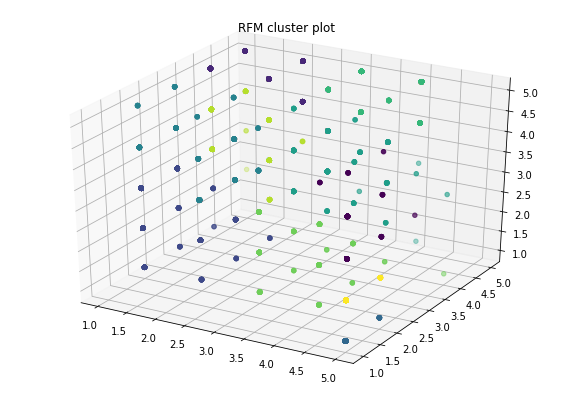

In [ ]:
import matplotlib.pyplot as plt
x = data_rfm['RecencyScore']
y = data_rfm['FrequencyScore']
z = data_rfm['MonetaryScore']
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, c = data_rfm['cluster'])
plt.title("RFM cluster plot")
plt.show()

In [ ]:
data_rfm.to_csv("/content/drive/MyDrive/Mini Project DataSet/rfm_with_clusters.csv", index = False)

In [ ]:
import pandas as pd
data_rfm = pd.read_csv("/content/drive/MyDrive/Mini Project DataSet/rfm_with_clusters.csv")

In [ ]:
!pip3 install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2


In [ ]:
from fcmeans import FCM
import numpy as np
from datetime import datetime
data = np.array(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
start_time = datetime.now()
fcm = FCM(n_clusters = 10)
fcm.fit(data)
data_rfm['fcmcluster'] = fcm.predict(data)
end_time =  datetime.now()

In [ ]:
timetaken = end_time-start_time
fcmtime = timetaken
fcmtime

datetime.timedelta(microseconds=977604)

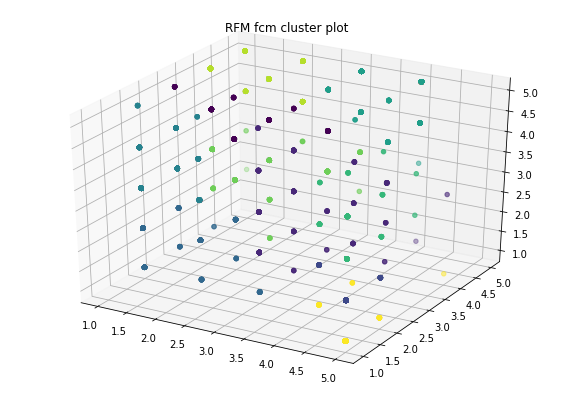

In [ ]:
import matplotlib.pyplot as plt
x = data_rfm['RecencyScore']
y = data_rfm['FrequencyScore']
z = data_rfm['MonetaryScore']
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, c = data_rfm['fcmcluster'])
plt.title("RFM fcm cluster plot")
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[4.98571429, 1.07857143, 3.25714286],
       [1.77631579, 4.62631579, 4.87368421],
       [1.21302817, 2.38732394, 2.19542254],
       [5.        , 1.0234375 , 1.        ],
       [1.70889488, 2.50404313, 3.81132075],
       [3.2681388 , 3.78864353, 3.52365931],
       [3.25858951, 4.88245931, 4.8318264 ],
       [3.37339056, 2.21459227, 1.98283262],
       [1.56521739, 4.07672634, 3.58823529],
       [5.        , 1.03930131, 2.        ]])

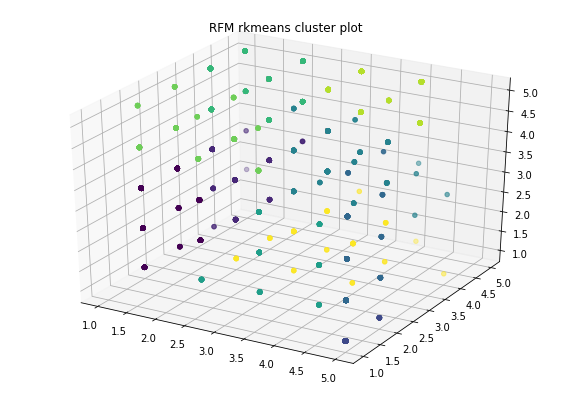

In [ ]:
start_time=datetime.now()
kmeans_r = KMeans(n_clusters=10, init='random')
kmeans_r.fit(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
data_rfm['cluster_r'] = kmeans_r.predict(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
end_time=datetime.now()
timetaken=end_time-start_time
rmtime=timetaken
x = data_rfm['RecencyScore']
y = data_rfm['FrequencyScore']
z = data_rfm['MonetaryScore']
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, c = data_rfm['cluster_r'])
plt.title("RFM rkmeans cluster plot")
plt.show()

In [ ]:
rmtime

datetime.timedelta(microseconds=80896)

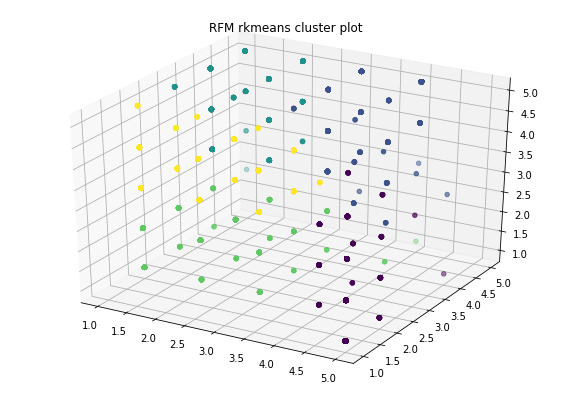

In [ ]:
start_time=datetime.now()
kmeans_r = KMeans(n_clusters=5, init='random')
kmeans_r.fit(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
data_rfm['cluster_r'] = kmeans_r.predict(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
end_time=datetime.now()
timetaken=end_time-start_time
rmtime=timetaken
x = data_rfm['RecencyScore']
y = data_rfm['FrequencyScore']
z = data_rfm['MonetaryScore']
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, c = data_rfm['cluster_r'])
plt.title("RFM rkmeans cluster plot")
plt.show()

In [ ]:
rmtime

datetime.timedelta(microseconds=49556)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


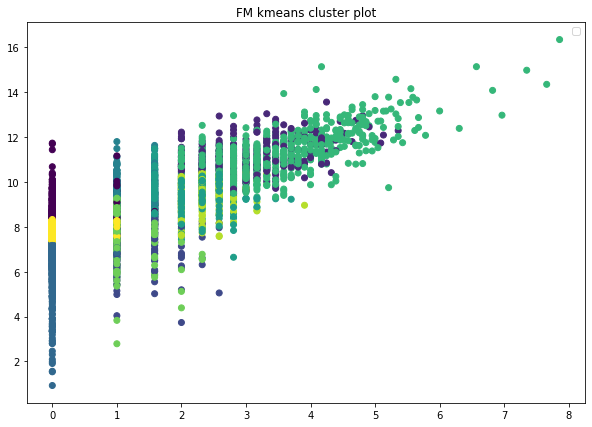

In [ ]:
x = np.log2(data_rfm['Frequency'])
y = np.log2(data_rfm['Monetary'])
fig = plt.figure(figsize = (10, 7))
plt.scatter(x, y, c = data_rfm['cluster'])
plt.title("FM kmeans cluster plot")
plt.legend()
plt.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

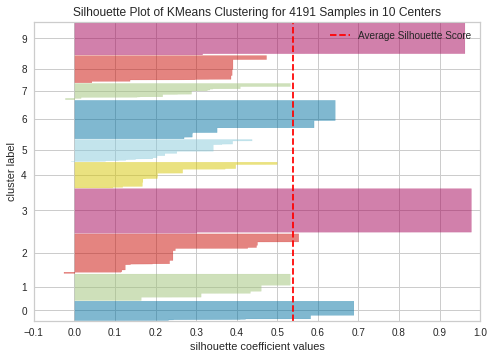

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10, random_state = 42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
visualizer.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']],data_rfm['cluster'])

0.5374613470889139

There are clusters which have silhouette score less than that of average. So, we try to reduce the no of clusters.

In [ ]:
kmeans_5 = KMeans(n_clusters = 5, random_state = 42)
kmeans_5.fit(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
data_rfm['cluster_5'] = kmeans_5.predict(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])

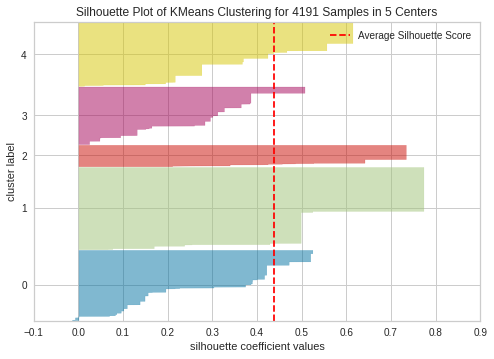

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
visualizer.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']],data_rfm['cluster_5'])

0.43811835817589173

In [ ]:
kmeans_r = KMeans(n_clusters=10, init='random')
kmeans_r.fit(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
data_rfm['cluster_r'] = kmeans_r.predict(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])

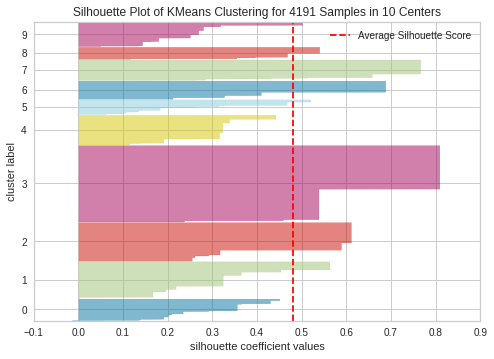

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10, init='random')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
visualizer.show()

In [ ]:
silhouette_score(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']],data_rfm['cluster_r'])

0.5507855371384267

TIME TAKEN FOR 5 CLUSTERS BY KMeans And FCM

In [ ]:
from fcmeans import FCM
import numpy as np
from datetime import datetime
data = np.array(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
start_time = datetime.now()
fcm = FCM(n_clusters = 5)
fcm.fit(data)
data_rfm['fcmcluster'] = fcm.predict(data)
end_time =  datetime.now()

In [ ]:
timetaken=end_time-start_time
fcm5clusters= timetaken
fcm5clusters

datetime.timedelta(microseconds=206907)

In [ ]:
from sklearn.cluster import KMeans
from datetime import datetime
start_time = datetime.now()
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
data_rfm['cluster'] = kmeans.predict(data_rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']])
end_time = datetime.now()

In [ ]:
timetaken= end_time-start_time
kmeans5clusters=timetaken
kmeans5clusters

datetime.timedelta(microseconds=133545)